# **IEOR242 Final Project**

# Data Cleaning and Preparation

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Load Afirca Data
# data=pd.read_csv('who_life_exp.csv')
# data_whole=data.loc[data['region'] == 'Africa']
# # print(data_whole.info())

data_whole = pd.read_excel('new_data.xlsx')
# print(data_whole.head())

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = (data_whole.isnull().sum() / len(data_whole)) * 100

# Identify columns with more than 30% null values
columns_to_drop = null_percentages[null_percentages > 30].index

# Drop the identified columns from the DataFrame
print('Columns to drop: ', columns_to_drop)
data_new = data_whole.drop(columns=columns_to_drop)

# Print the modified DataFrame
# print(data_new.info())

Columns to drop:  Index(['doctors', 'hospitals', 'une_poverty', 'une_edu_spend', 'une_literacy',
       'une_school'],
      dtype='object')


In [ ]:
#print(data_new.head(5))

In [ ]:
# Drop more columns
data_new2 = data_new.drop(columns = ['country_code','region','life_exp60','une_life','hepatitis'])
# print(data_new2.info())

In [ ]:
# Fill null values using previous values
df = data_new2.fillna(method='ffill')
# print(df.info())

In [ ]:
# Rename columns
df.rename(columns={'age1-4mort':'age1_4mort', 'age5-19thinness':'age5_19thinness', 'age5-19obesity':'age5_19obesity', 'gghe-d':'gghe_d'},inplace=True)


VIF Data for African Region:
           Variable          VIF
0              year  1020.114275
1   adult_mortality    40.924694
2       infant_mort   798.422598
3        age1_4mort    22.027148
4           alcohol     4.009322
5               bmi  1130.160410
6   age5_19thinness    39.020676
7    age5_19obesity     8.647803
8           measles   177.600633
9             polio   277.221943
10       diphtheria   320.406398
11      basic_water    54.728302
12       gni_capita    12.472424
13           gghe_d     9.451517
14          che_gdp    10.963620
15          une_pop     2.408352
16       une_infant   746.860260
17          une_hiv     7.827268
18          une_gni    17.709924
19          migrate     1.109776
20          suicide     5.264303


<ipython-input-8-daa15799be8c>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


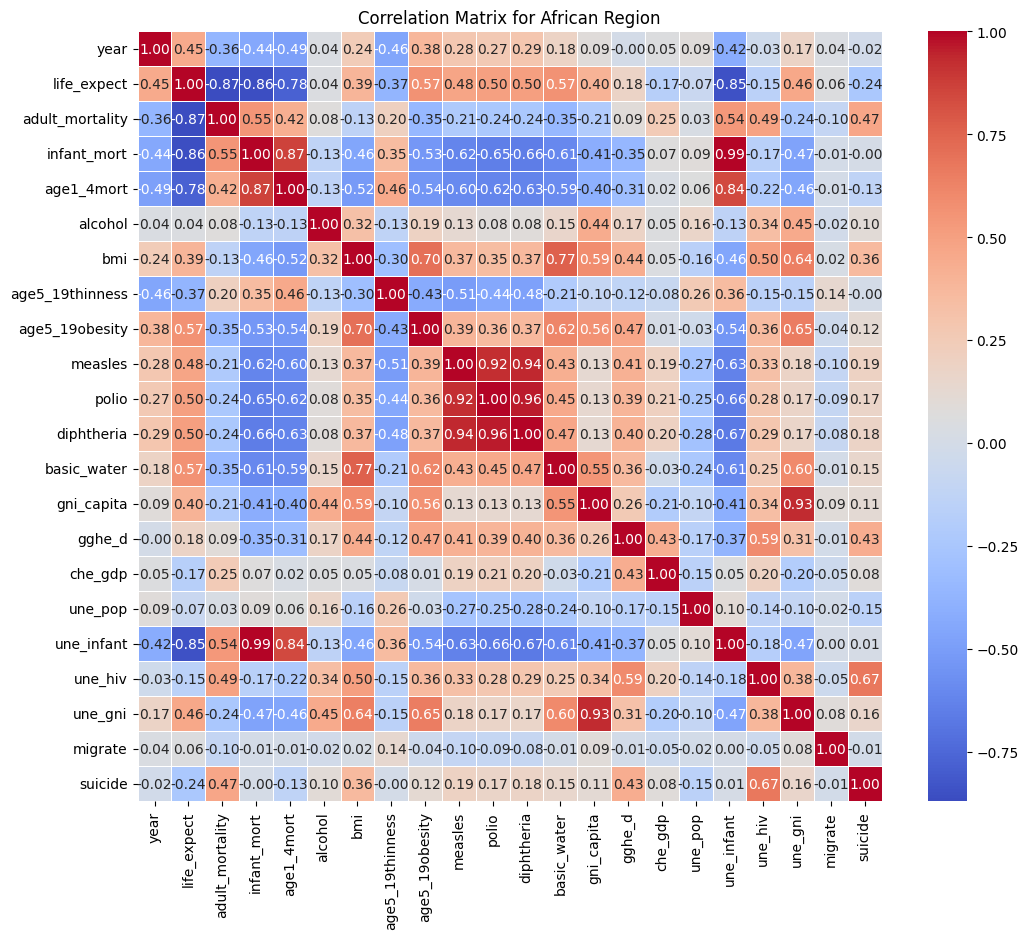

In [ ]:
# Data multicollinearity
# Extract only numeric columns
dfX = df.copy().drop(columns = 'life_expect')
numeric_columns = dfX.select_dtypes(include=['float64', 'int64']).columns
X = dfX[numeric_columns]

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print("VIF Data for African Region:")
print(vif_data)

# Create a correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for African Region")
plt.show()

In [ ]:
# Drop highly correlated variates
df = df.drop(columns = ['une_infant', 'une_gni'])

count    799.000000
mean      57.679362
std        7.068533
min       39.827340
25%       52.705245
50%       57.418300
75%       61.720360
max       76.363650
Name: life_expect, dtype: float64
Median Life Expectancy: 57.4183
Variance of Life Expectancy: 49.96415684140576


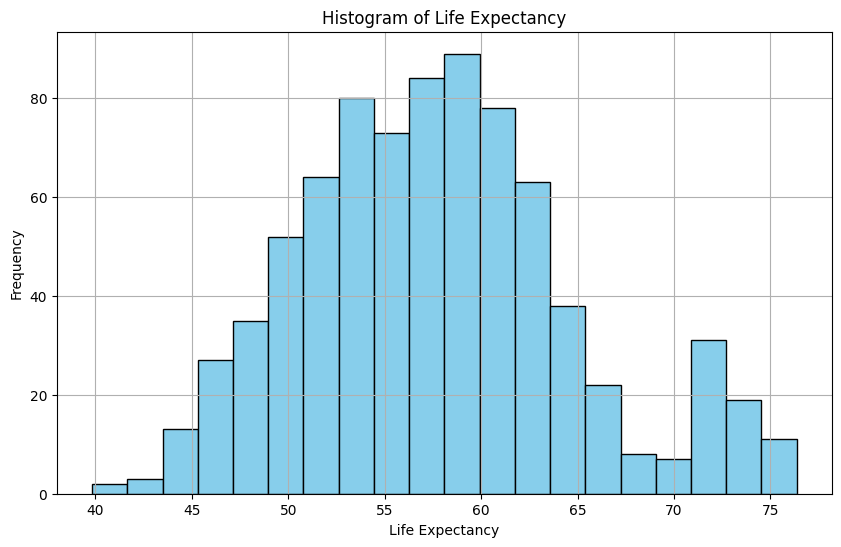

In [ ]:
# Check life_expect statistics
life0 = df['life_expect']

basic_stats = life0.describe()

medlife0 = life0.median()
varlife0 = life0.var()

print(basic_stats)
print(f"Median Life Expectancy: {medlife0}")
print(f"Variance of Life Expectancy: {varlife0}")

# Plot a histogram for Life_Expectancy
plt.figure(figsize=(10, 6))
plt.hist(life0, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Separate into training and testing set
data_train = df[df['year'] <= 2012]
data_test = df[df['year'] >= 2013]

len(data_train), len(data_test)

(611, 188)

In [ ]:
# Form dataframe
# x_train = data_train[['adult_mortality', 'infant_mort', 'age1_4mort', 'alcohol', 'bmi', 'age5_19thinness', 'age5_19obesity', 'measles', 'polio', 'diphtheria', 'basic_water', 'gni_capita', 'gghe_d', 'che_gdp', 'une_pop', 'une_infant', 'une_hiv', 'une_gni','migrate', 'suicide']]
# y_train = data_train['life_expect']

# x_test = data_test[['adult_mortality', 'infant_mort', 'age1_4mort', 'alcohol', 'bmi', 'age5_19thinness', 'age5_19obesity', 'measles', 'polio', 'diphtheria', 'basic_water', 'gni_capita', 'gghe_d', 'che_gdp', 'une_pop', 'une_infant', 'une_hiv', 'une_gni','migrate', 'suicide']]
# y_test = data_test['life_expect']

x_train = data_train[['adult_mortality', 'infant_mort', 'age1_4mort', 'alcohol', 'bmi', 'age5_19thinness', 'age5_19obesity', 'measles', 'polio', 'diphtheria', 'basic_water', 'gni_capita', 'gghe_d', 'che_gdp', 'une_pop', 'une_hiv','migrate', 'suicide']]
y_train = data_train['life_expect']

x_test = data_test[['adult_mortality', 'infant_mort', 'age1_4mort', 'alcohol', 'bmi', 'age5_19thinness', 'age5_19obesity', 'measles', 'polio', 'diphtheria', 'basic_water', 'gni_capita', 'gghe_d', 'che_gdp', 'une_pop', 'une_hiv', 'migrate', 'suicide']]
y_test = data_test['life_expect']

In [ ]:
# Data normalization
mean_x = x_train.mean()
std_x = x_train.std()
normalized_train_x = (x_train - mean_x) / std_x

mean_y = y_train.mean()
std_y = y_train.std()
normalized_train_y = (y_train - mean_y) / std_y

mean_x_test = x_test.mean()
std_x_test = x_test.std()
normalized_test_x=(x_test - mean_x_test) / std_x_test

mean_y_test = y_test.mean()
std_y_test = y_test.std()
normalized_test_y = (y_test - mean_y_test) / std_y_test

In [ ]:
# Add categorical column and dummies: country
normalized_train_x_cat = normalized_train_x.copy(deep = True)
normalized_train_x_cat['country'] = data_train['country']
normalized_train_x_cato = pd.get_dummies(normalized_train_x_cat, columns=['country'], drop_first = True)

normalized_test_x_cat = normalized_test_x.copy(deep = True)
normalized_test_x_cat['country'] = data_test['country']
normalized_test_x_cato = pd.get_dummies(normalized_test_x_cat, columns=['country'], drop_first = True)

In [ ]:
# OSR2
def OSR2(model, train_y, test_x, test_y):
    y_test = test_y
    y_pred = model.predict(test_x)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(train_y))**2)
    return 1 - SSE/SST

# **Ordinary Linear Regression**

In [ ]:
# Basic Linear Model
import statsmodels.api as sm
model0 = sm.OLS(normalized_train_y, normalized_train_x).fit()
print(model0.summary())
score0 = OSR2(model0, normalized_train_y, normalized_test_x, normalized_test_y)
print(score0)

                                 OLS Regression Results                                
Dep. Variable:            life_expect   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              3120.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):                        0.00
Time:                        05:36:01   Log-Likelihood:                          527.00
No. Observations:                 611   AIC:                                     -1018.
Df Residuals:                     593   BIC:                                     -938.5
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
# Catogorical Linear Model
model1 = sm.OLS(normalized_train_y, normalized_train_x_cato).fit()
print(model1.summary())
score1 = OSR2(model1, normalized_train_y, normalized_test_x_cato, normalized_test_y)
print(score1)

                                 OLS Regression Results                                
Dep. Variable:            life_expect   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              5377.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):                        0.00
Time:                        05:36:01   Log-Likelihood:                          1102.7
No. Observations:                 611   AIC:                                     -2077.
Df Residuals:                     547   BIC:                                     -1795.
Df Model:                          64                                                  
Covariance Type:            nonrobust                                                  
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------

# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define Ridge Regression model
ridge_model = Ridge()

# Define a range of alpha values to test
alphas = np.array(range(1,10,1))

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(normalized_train_x_cato, normalized_train_y)

# Print the best alpha and corresponding mean cross-validated score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f'Best Alpha: {best_alpha}')
print(f'Best Mean Cross-Validated Score: {best_score:.4f}')


Best Alpha: 6
Best Mean Cross-Validated Score: -0.0180


In [ ]:
# OSR2
clf1 = Ridge(alpha=best_alpha)
model5 = clf1.fit(normalized_train_x_cato, normalized_train_y)
score5 = OSR2(model5, normalized_train_y, normalized_test_x_cato, normalized_test_y)
print(score5)

0.9891598969889291


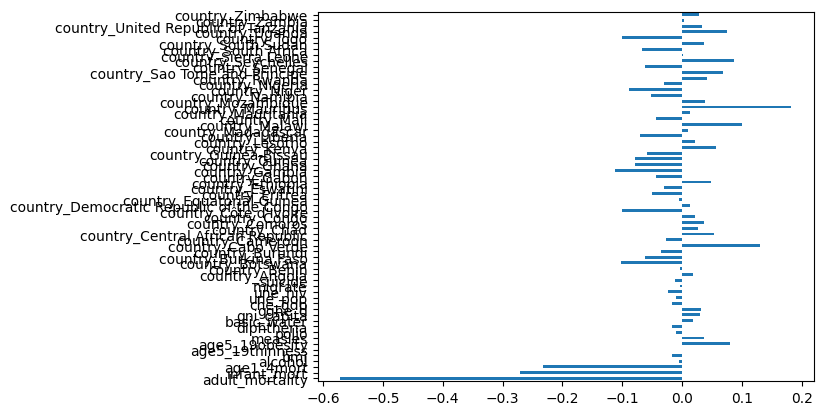

adult_mortality                       -0.571441
infant_mort                           -0.270349
age1_4mort                            -0.231902
alcohol                               -0.005771
bmi                                   -0.016185
                                         ...   
country_Togo                          -0.100730
country_Uganda                         0.075817
country_United Republic of Tanzania    0.033337
country_Zambia                         0.003276
country_Zimbabwe                       0.028645
Length: 64, dtype: float64
64


In [ ]:
# Feature Importance
importance = model5.coef_
feat_importances = pd.Series(importance, index = normalized_train_x_cato.columns)
filtered_series = feat_importances[feat_importances != 0]
filtered_series.plot(kind='barh')
plt.show()
print(filtered_series)
print(len(filtered_series))

# **LASSO**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn import linear_model

In [ ]:
# Initialize the LassoCV model with a list of alpha values to test
alphas = np.array([0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05])
lasso_cv_model = LassoCV(alphas=alphas, cv=5)

# Fit the LassoCV model
lasso_cv_model.fit(normalized_train_x_cato, normalized_train_y)

# Print the best alpha value
best_alpha = lasso_cv_model.alpha_
print(f'Best alpha: {best_alpha}')

Best alpha: 0.009


In [ ]:
# OSR2
clf2 = linear_model.Lasso(alpha=best_alpha)
model2 = clf2.fit(normalized_train_x_cato, normalized_train_y)
score2 = OSR2(model2, normalized_train_y, normalized_test_x_cato, normalized_test_y)
print(score2)

0.9799261580576188


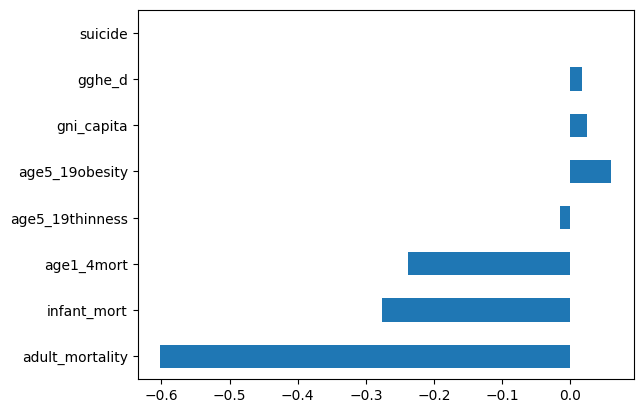

In [ ]:
# Feature Importance
importance2 = model2.coef_
feat_importances2 = pd.Series(importance2, index = normalized_train_x_cato.columns)
filtered_series2 = feat_importances2[feat_importances2 != 0]
filtered_series2.plot(kind='barh')
plt.show()

In [ ]:
# print the used features in LASSO
print(filtered_series2)

adult_mortality   -0.601804
infant_mort       -0.277019
age1_4mort        -0.238786
age5_19thinness   -0.015235
age5_19obesity     0.059568
gni_capita         0.024926
gghe_d             0.017480
suicide           -0.001262
dtype: float64


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param = {'ccp_alpha':[0,0.001,0.002,0.003,0.004,0.005,0.01]}

RegRF = RandomForestRegressor(random_state=333)
grid_rf = GridSearchCV(RegRF, param,scoring='r2',cv=5).fit(normalized_train_x_cato, normalized_train_y)

print("The best complexity parameter is ",grid_rf.best_params_)

The best complexity parameter is  {'ccp_alpha': 0}


In [ ]:
# OSR2
RF = RandomForestRegressor(ccp_alpha = grid_rf.best_params_['ccp_alpha'])
model3 = RF.fit(normalized_train_x_cato, normalized_train_y)
score3 = OSR2(model3, normalized_train_y, normalized_test_x_cato, normalized_test_y)
print(score3)

0.9792588622951387


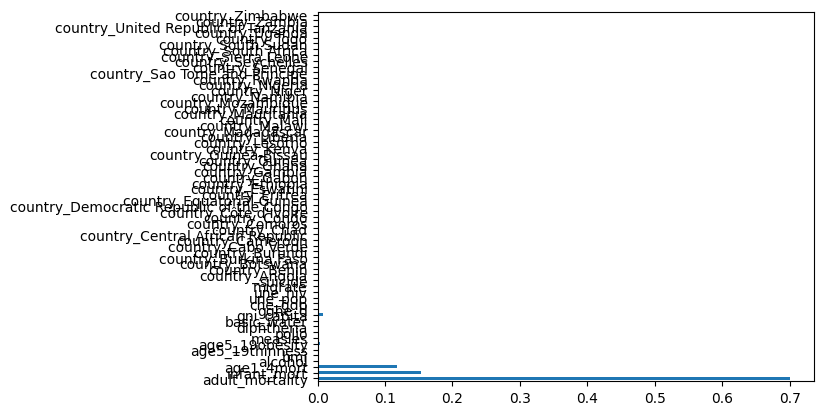

adult_mortality                        0.700461
infant_mort                            0.153587
age1_4mort                             0.118330
alcohol                                0.000708
bmi                                    0.000688
                                         ...   
country_Togo                           0.000020
country_Uganda                         0.000002
country_United Republic of Tanzania    0.000005
country_Zambia                         0.000003
country_Zimbabwe                       0.000004
Length: 64, dtype: float64
64


In [ ]:
# Feature Importance
importance3 = model3.feature_importances_
feat_importances3 = pd.Series(importance3, index = normalized_train_x_cato.columns)
filtered_series3 = feat_importances3[feat_importances3 != 0]
filtered_series3.plot(kind='barh')
plt.show()
print(filtered_series3)
print(len(filtered_series3))

# **Adaboost Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200]}

adaboost_reg = AdaBoostRegressor(random_state=42)

grid_search = GridSearchCV(adaboost_reg, param_grid, cv=5, scoring='r2')
grid_search.fit(normalized_train_x_cato, normalized_train_y)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# best_model = grid_search.best_estimator_
# score = OSR2(best_model, normalized_train_y, normalized_test_x_cato, normalized_test_y)
# print("OSR2 Score on Test Data:", score)

Best Parameters: {'n_estimators': 200}


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_reg = AdaBoostRegressor(n_estimators=best_params['n_estimators'], random_state=42)
model4 = adaboost_reg.fit(normalized_train_x_cato, normalized_train_y)
score4 = OSR2(model4, normalized_train_y, normalized_test_x_cato, normalized_test_y)
print(score4)

0.9779059649380244


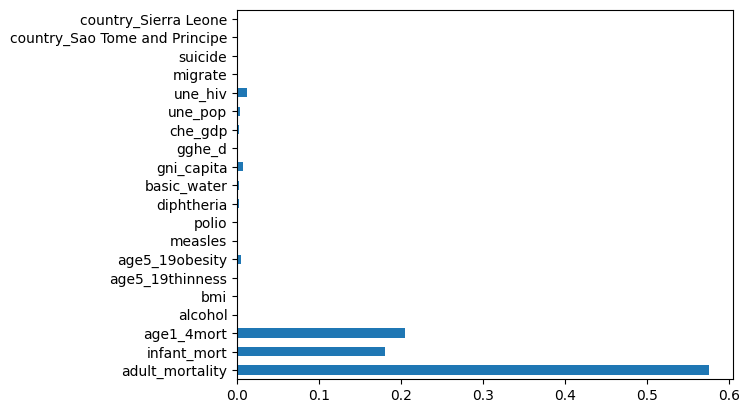

In [ ]:
# Feature Importance
importance4 = model4.feature_importances_
feat_importances4 = pd.Series(importance4, index = normalized_train_x_cato.columns)
filtered_series4 = feat_importances4[feat_importances4 != 0]
filtered_series4.plot(kind='barh')
plt.show()

# Model Selection

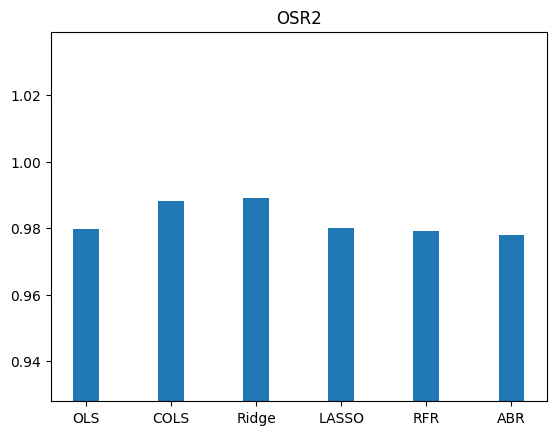

[0.979815145214685, 0.9880614819485806, 0.9891598969889291, 0.9799261580576188, 0.9792588622951387, 0.9779059649380244]


In [ ]:
scores = [score0, score1, score5, score2, score3, score4]
models = ['OLS','COLS','Ridge','LASSO','RFR','ABR']
plt.bar(models,scores,width=0.3)
plt.ylim(bottom=min(scores)-0.05,top=max(scores) + 0.05)
plt.title('OSR2')
plt.show()
print(scores)


# Model Analysis

## Life expectancy 60

In [ ]:
# Keep life expectancy 60 as the data we want to predict
life60 = data_new['life_exp60']

# Append life_exp60 to the processed dataset
df2 = df.copy()
df2['life60'] = life60

# Take out the test set
y_life60_train = df2[df2['year'] <= 2012]['life60']
y_life60_test = df2[df2['year'] >= 2013]['life60']

# Normalize the life_exp60
mean_y60 = y_life60_train.mean()
std_y60 = y_life60_train.std()
normalized_y60 = (y_life60_train - mean_y60) / std_y60

mean_y60_test = y_life60_test.mean()
std_y60_test = y_life60_test.std()
normalized_y60_test = (y_life60_test - mean_y60_test) / std_y60_test


In [ ]:
model_num = [model0, model1, model5, model2, model3, model4]
models = ['OLS','COLS','Ridge','LASSO','RFR','ABR']

# Create an empty list to store OSR2 scores for each model
osr2_scores = []

# Iterate over the models and calculate OSR2 for each
for model, model_name in zip(model_num, models):
  if model == model0:
    osr2 = OSR2(model, normalized_train_y, normalized_test_x, normalized_y60_test)
  else:
    osr2 = OSR2(model, normalized_train_y, normalized_test_x_cato, normalized_y60_test)
  osr2_scores.append(osr2)
  print(f"OSR2 for {model_name}: {osr2}")

# Print the list of OSR2 scores for all models
print("List of OSR2 scores for all models:", osr2_scores)


OSR2 for OLS: 0.5598585181988704
OSR2 for COLS: 0.6129261760383917
OSR2 for Ridge: 0.5954209190162536
OSR2 for LASSO: 0.5559633827038973
OSR2 for RFR: 0.6227479413968735
OSR2 for ABR: 0.6378934018506832
List of OSR2 scores for all models: [0.5598585181988704, 0.6129261760383917, 0.5954209190162536, 0.5559633827038973, 0.6227479413968735, 0.6378934018506832]


In [ ]:
# so if we use the life_exp model to predict the life_exp60, all of the models proposed are not desirable as the OSR2 are not too high.